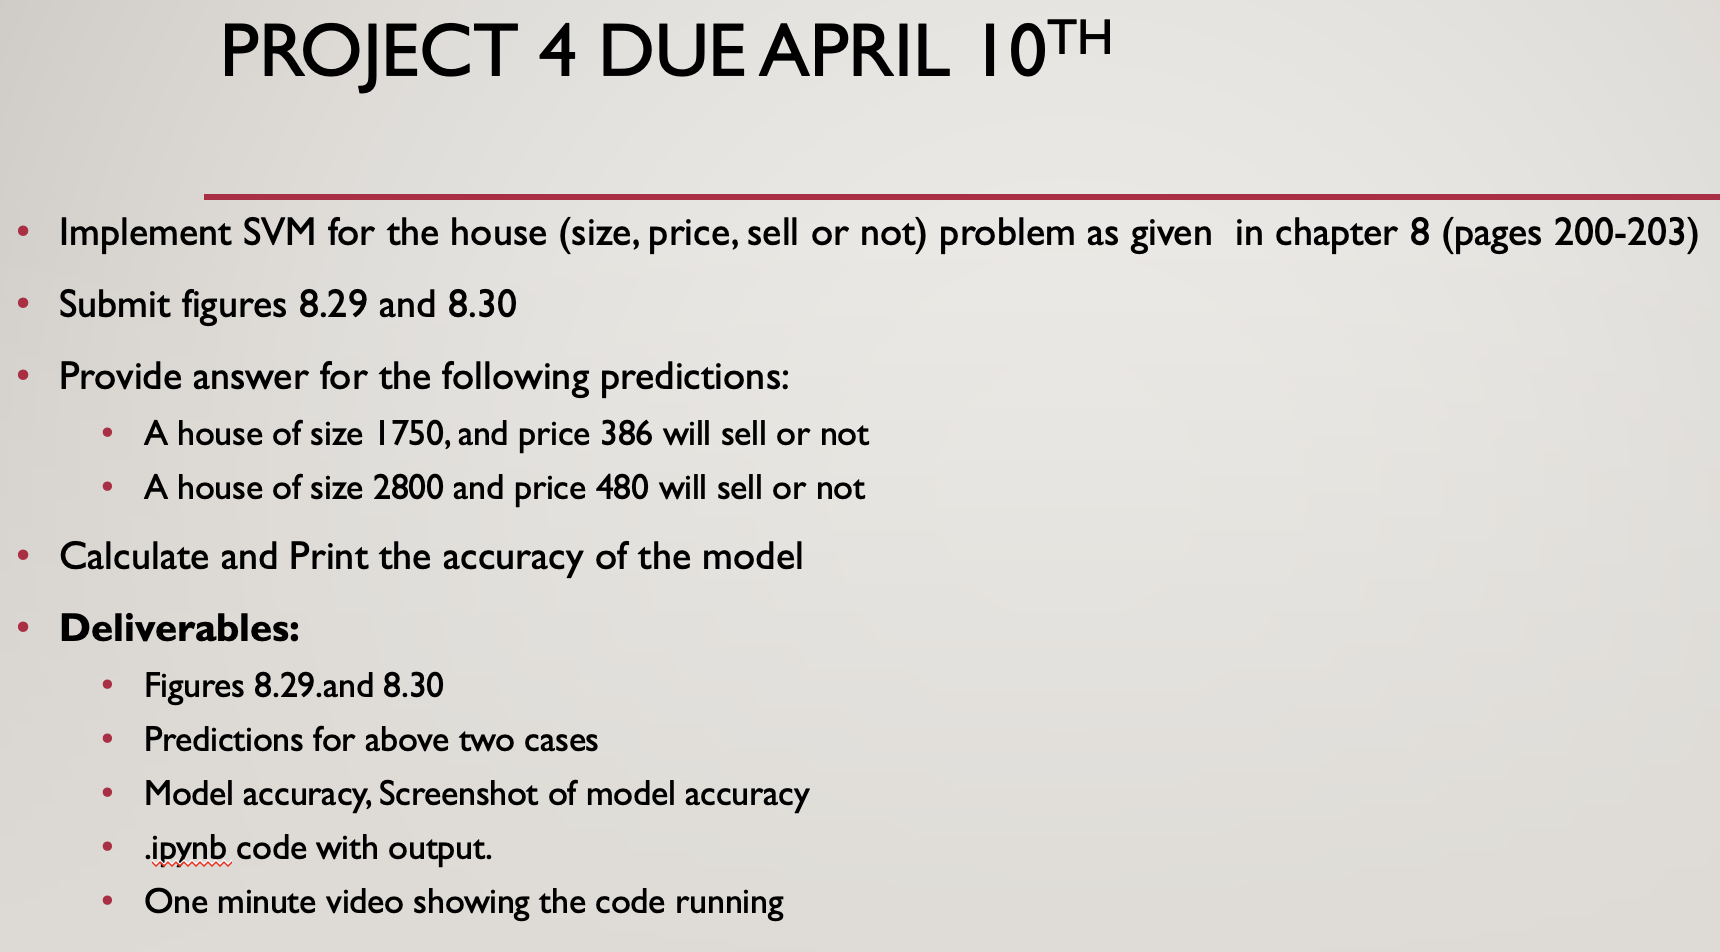

### Project 4 Implementing SVM

* Implement SVM for the house (size, price, sell or not) problem as given in chapter 8 (pages 200-203)
* Submit figures 8.29 and 8.30
* Provide answer for the following predictions:
    * A house of size 1750, and price 386 will sell or not
    * Ahouse of size 2800 and price 480 will sell or not
* Calculate and Print the accuracy of the model

### Deliverables:

* Figures 2.29 and 8.30
* Prediction for above two cases
* Model accuracy, SS of model accuracy
* .ipynb code with output
* One minute video showing the code running

## Using SVM for Real Life - Problems

### **dataset**: house_sizes_prices_svm.csv<br>
Containing the size of houses and their asking prices in thousands respectively for a particular area.<br>

The third column indicates if the house was sold. Using this dataset, our goal is to predict if a house with a specific asking price would be able to sell.

```python
size    price   sold
550,    50,     У
1000,   100,    У
1200,   123,    Y
1500,   350,    n
3000,   200,    У
2500,   300,    у
750,    45,     Y
1500,   280,    n
780,    400,    n
1200,   450,    n
2750,   500,    n

```

Index(['size', 'price', 'sold'], dtype='object')


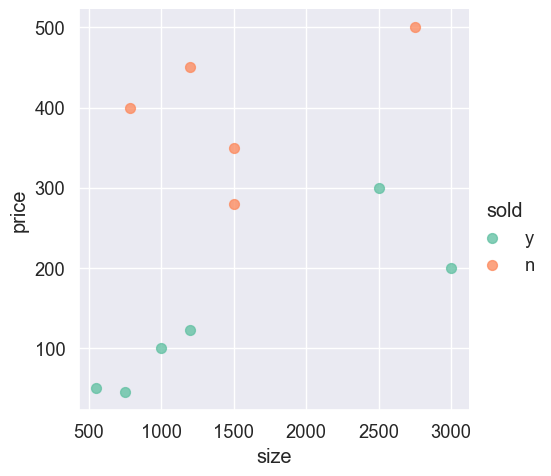

In [27]:
%matplotlib inline
import pandas as pd 
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

data = pd.read_csv('house_sizes_prices_svm.csv')
print(data.columns)
sns.lmplot(x='size',y='price', #COLUMN Names sust be passed as keyword arguments, not positional arguments
           data = data,
           hue = 'sold',
           palette = 'Set2',
           fit_reg = False,
           scatter_kws = {"s" : 50});

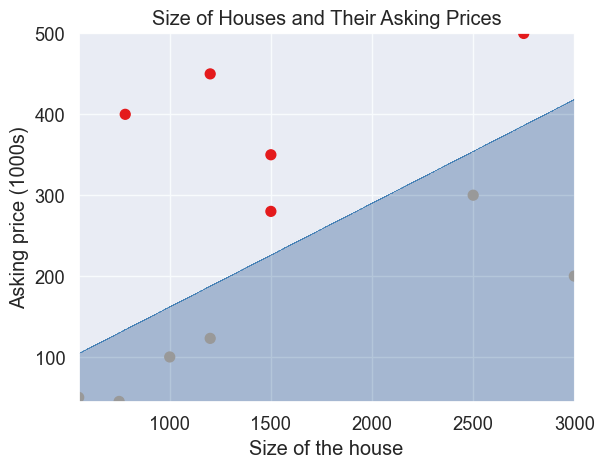

In [59]:
X = data[['size','price',]].values
y = np.where(data['sold'] == 'y', 1 , 0) #-- 1 for Y and 0 for N--

model = svm.SVC(kernel ='linear').fit(X,y)

#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#--min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---------------
h = (x_max / x_min) / 20

#---make predictions for each of the points in xx,yy--------------
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot--
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.Blues, alpha=0.3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, s=50)

plt.xlabel('Size of the house')
plt.ylabel('Asking price (1000s)')
plt.title("Size of Houses and Their Asking Prices")
plt.show()

In [48]:
def will_it_sell(size, price) :
    if(model.predict([[size, price]])) == 0:
        print("Will not sell!")
    else:
        print('Will sell!')

#---do some prediction---
will_it_sell(2500, 400) #Will not sell!
will_it_sell(2500, 200) #Will sell!

Will not sell!
Will sell!
